/tmp/ipython-input-3182177155.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nyse_daily  = yf.download('^NYA', start=start, end=end)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3182177155.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tbill_daily = yf.download('^IRX', start=start, end=end)['Close']
[*********************100%***********************]  1 of 1 completed


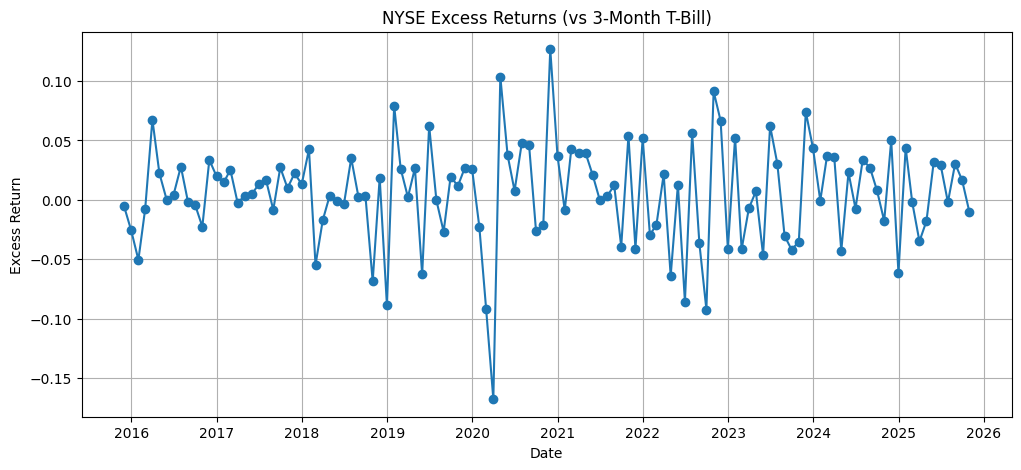

In [66]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

start = '2015-10-18'
end   = '2025-10-18'

nyse_daily  = yf.download('^NYA', start=start, end=end)['Close']
tbill_daily = yf.download('^IRX', start=start, end=end)['Close']

nyse_monthly  = nyse_daily.resample('ME').last()
tbill_monthly = (1 + tbill_daily.resample('ME').last() / 100)**(1/12) - 1

nyse_series  = nyse_monthly.squeeze()
tbill_series = tbill_monthly.squeeze()

returns_nyse = nyse_series.pct_change().dropna()
excess_returns = returns_nyse - tbill_series.reindex(returns_nyse.index)

plt.figure(figsize=(12,5))
plt.plot(excess_returns.index, excess_returns.values, marker='o', linestyle='-')
plt.title('NYSE Excess Returns (vs 3-Month T-Bill)')
plt.xlabel('Date')
plt.ylabel('Excess Return')
plt.grid(True)
plt.show()


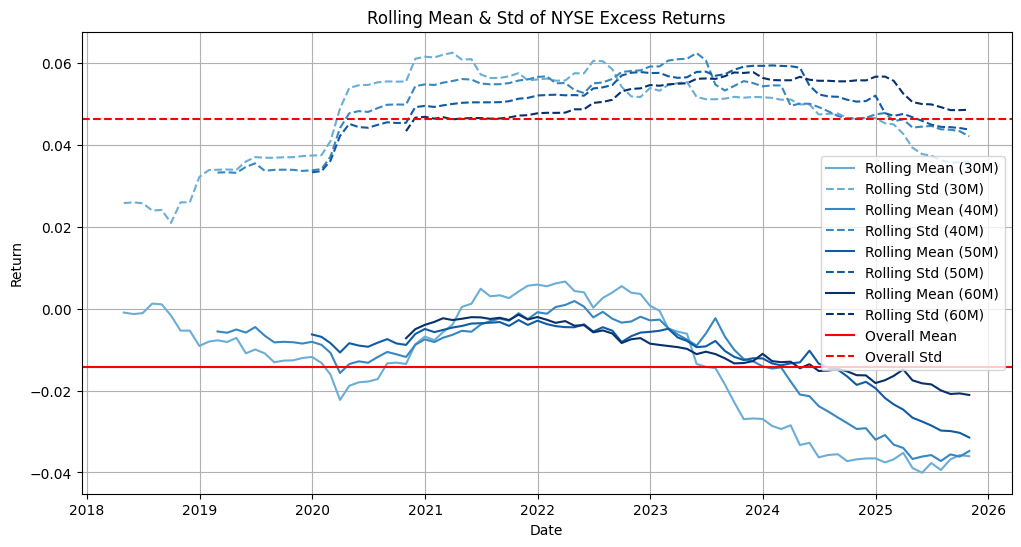

In [67]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

window_sizes = [30, 40, 50, 60]

# Genera 4 tonalità di blu
blues = plt.cm.Blues(np.linspace(0.5, 1, len(window_sizes)))

plt.figure(figsize=(12,6))

for i, w in enumerate(window_sizes):
    plt.plot(rolling_means[w], color=blues[i], linestyle='-', label=f'Rolling Mean ({w}M)')
    plt.plot(rolling_stds[w], color=blues[i], linestyle='--', label=f'Rolling Std ({w}M)')

# Linee complessive in rosso
plt.axhline(overall_mean, color='red', linestyle='-', label='Overall Mean')
plt.axhline(overall_std, color='red', linestyle='--', label='Overall Std')

plt.title('Rolling Mean & Std of NYSE Excess Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()



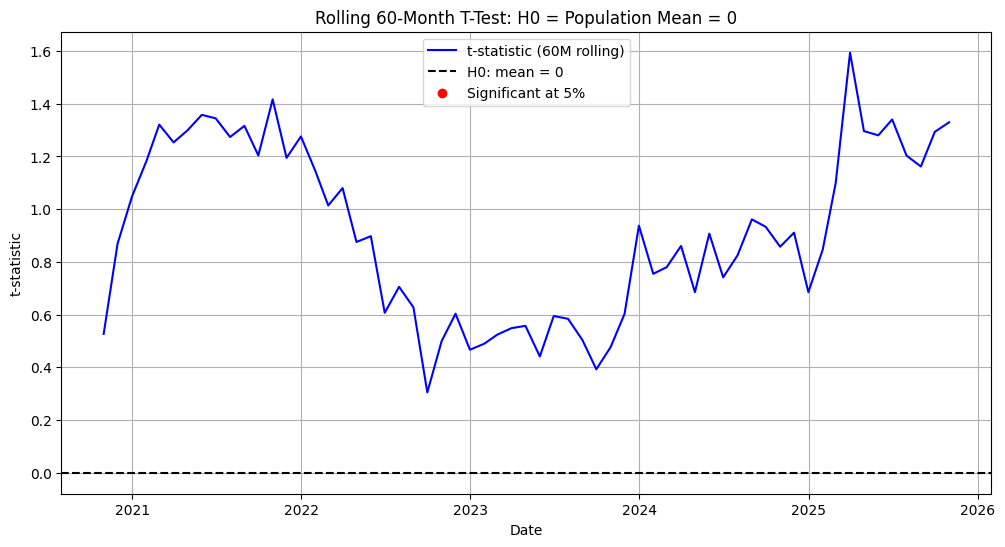

Number of significant periods: 0
Dates with significant excess returns:
DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq='ME')


In [68]:
import matplotlib.pyplot as plt
from scipy.stats import t
import numpy as np

window = 60
alpha = 0.05

rolling_mean = excess_returns.rolling(window).mean()
rolling_std  = excess_returns.rolling(window).std()

t_stat = rolling_mean / (rolling_std / np.sqrt(window))
p_values = 2 * (1 - t.cdf(np.abs(t_stat), df=window-1))
significant = p_values < alpha

plt.figure(figsize=(12,6))
plt.plot(t_stat.index, t_stat.values, color='blue', label='t-statistic (60M rolling)')
plt.axhline(0, color='black', linestyle='--', label='H0: mean = 0')
plt.scatter(t_stat.index[significant], t_stat[significant], color='red', label='Significant at 5%')
plt.title('Rolling 60-Month T-Test: H0 = Population Mean = 0')
plt.xlabel('Date')
plt.ylabel('t-statistic')
plt.legend()
plt.grid(True)
plt.show()

print("Number of significant periods:", significant.sum())